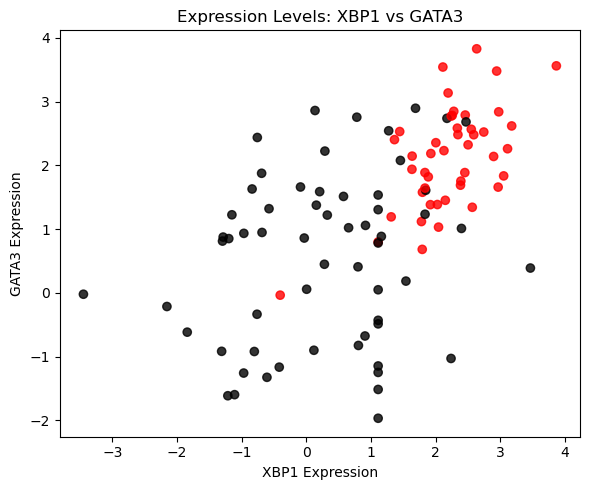

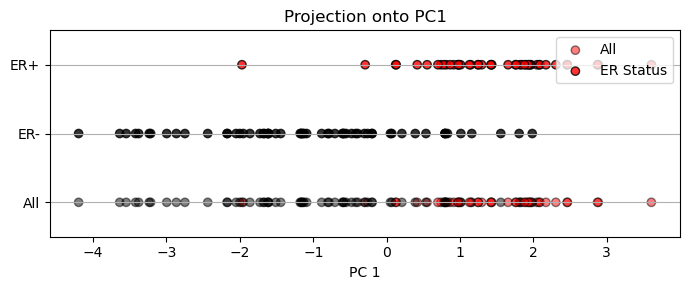

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip

er_status = pd.read_csv("class.tsv", sep="\t", header=None, names=["ER_Status"])["ER_Status"]

metadata = pd.read_csv("columns.tsv.gz", sep="\t", comment="#")

genes_of_interest = metadata[metadata["GeneSymbol"].isin(["XBP1", "GATA3"])]["ID"].astype(str).tolist()

with gzip.open("filtered.tsv.gz", "rt") as file:
    expression_data = pd.read_csv(file, sep="\t")

expression_data.columns = expression_data.columns.str.strip()
selected_expression = expression_data[genes_of_interest].copy()
selected_expression.columns = ["XBP1", "GATA3"]

plt.figure(figsize=(6, 5))
colors = er_status.map({0: "black", 1: "red"})
plt.scatter(selected_expression["XBP1"], selected_expression["GATA3"], c=colors, alpha=0.8)
plt.xlabel("XBP1 Expression")
plt.ylabel("GATA3 Expression")
plt.title("Expression Levels: XBP1 vs GATA3")
plt.tight_layout()
plt.show()

pca = PCA(n_components=1)
pc1 = pca.fit_transform(selected_expression)

plt.figure(figsize=(7, 3))

all_category_y = [-1] * len(pc1)  # Create a y-position for "All"
plt.scatter(pc1, all_category_y, c=colors, alpha=0.5, edgecolor='k', label="All")  # Plot "All" points

plt.scatter(pc1, er_status, c=colors, alpha=0.8, edgecolor='k', label="ER Status")

plt.yticks([1, 0, -1], ["ER+", "ER-", "All"])
plt.ylim(-1.5, 1.5)  # Adjust limits to fit the "All" category
plt.xlabel("PC 1")
plt.title("Projection onto PC1")
plt.grid(True, axis='y')
plt.tight_layout()
plt.legend(loc="upper right")  # Add a legend for clarity
plt.show()